<a href="https://colab.research.google.com/github/raj-vijay/dl/blob/master/03_Advanced_Operations_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Advanced Operations in TensorFlow**

Basic operations in TensorFlow: add() , multiply() , matmul() , and reduce_sum()

Advanced operations: gradient() , reshape() , and random()

**gradient()** : Computes the slope of a function at a point

**reshape()** : Reshapes a tensor (e.g. 10x10 to 100x1)

**random()** : Populates tensor with entries drawn from a probability distribution

**Gradient Operator**

- Used for finding the optimum.
- Minimum: Lowest value of a loss function.
- Maximum: Highest value of objective function.

Use the gradient() operation.
- Optimum: Find a point where gradient = 0.
- Minimum: Change in gradient > 0
- Maximum: Change in gradient < 0

In [0]:
# Import tensorflow under the alias tf
import tensorflow as tf

# Define x
x = tf.Variable(-1.0)

# Define y within instance of GradientTape
with tf.GradientTape() as tape:
  tape.watch(x)
  y = tf.multiply(x, x)

# Evaluate the gradient of y at x = -1
g = tape.gradient(y, x)
print(g.numpy())

-2.0


**Reshape a grayscale image**

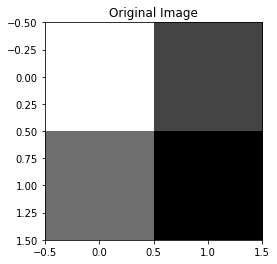

In [0]:
import matplotlib.pyplot as plt
# Import tensorflow as alias tf
import tensorflow as tf

# Generate grayscale image
gray = tf.random.uniform([2, 2], maxval=255, dtype='int32')
plt.title("Original Image")
plt.imshow(gray, cmap ='gray')

# Reshape grayscale image
gray = tf.reshape(gray, [2*2, 1])

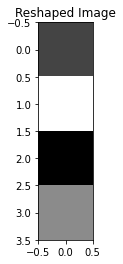

In [0]:
plt.title("Reshaped Image")
plt.imshow(gray, cmap ='gray')

**Reshape a color image**

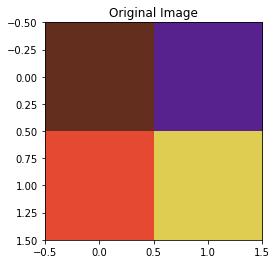

In [0]:
# Import tensorflow as alias tf
import tensorflow as tf
# Generate color image
color = tf.random.uniform([2, 2, 3], maxval=255, dtype='int32')
plt.title("Original Image")
plt.imshow(color)
# Reshape color image
color = tf.reshape(color, [2*2, 3])

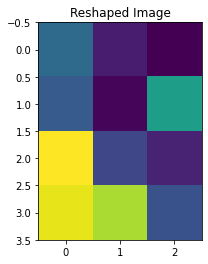

In [0]:
plt.title("Reshaped Image")
plt.imshow(color)

**Optimizing with gradients**

Minimize the loss function, y=x^2
![alt text](https://assets.datacamp.com/production/repositories/3953/datasets/4a3d06616c28aed697d57914a26da3d831bac83c/gradient_plot.png)

To achieve this compute the slope using the GradientTape() operation at different values of x. 

- If the slope is positive, decrease the loss by lowering x. 
- If it is negative, decrease the loss by increasing x.

This is how gradient descent works.

In [0]:
# Import operations from tensorflow
from tensorflow import Variable, GradientTape, multiply

def compute_gradient(x0):
  	# Define x as a variable with an initial value of x0
	x = Variable(x0)
	with GradientTape() as tape:
		tape.watch(x)
        # Define y using the multiply operation
		y = multiply(x, x)
    # Return the gradient of y with respect to x
	return tape.gradient(y, x).numpy()

# Compute and print gradients at x = -1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

-2.0
2.0
0.0


In [0]:
gray_tensor = tf.constant([[187,189,190,192,195,198,198,198,200,200,201,205,206,203,206,206,206,207,209,207,205,205,208,208,206,207,206,206]
,[189,191,193,195,197,199,200,199,200,201,202,206,206,208,204,204,210,209,208,208,207,206,208,208,207,207,207,207]
,[189,192,195,198,198,201,202,203,205,206,205,209,207,204,211,210,205,208,211,208,206,207,209,210,210,208,210,210]
,[191,192,195,197,199,199,204,201,203,208,206,207,209,207,213,208,209,211,221,205,204,239,182,212,213,212,209,209]
,[193,195,195,199,201,201,203,205,206,216,223,203,207,239,225,193,188,230,232,195,176,239,191,205,215,212,211,213]
,[194,196,199,200,206,202,205,207,196,255,238,197,160,235,226,191,146,190,226,201,160,228,211,162,215,214,216,213]
,[195,198,201,202,202,203,232,215,197,246,230,215,153,235,221,205,162,181,224,210,166,202,209,163,190,213,211,213]
,[196,198,201,208,202,243,240,215,166,246,233,223,171,235,212,214,165,206,224,199,152,126,206,199,170,165,214,215]
,[198,201,197,204,189,247,244,230,206,246,235,220,188,235,211,218,142,227,223,176,152,74,192,206,200,145,177,215]
,[200,203,206,206,236,254,254,233,215,205,242,219,185,234,230,223,131,201,209,156,141,83,175,220,196,157,185,222]
,[201,200,201,193,253,231,245,246,209,159,241,214,176,219,234,212,133,132,175,149,109,100,225,226,209,147,219,221]
,[202,203,203,196,253,209,241,233,194,150,234,204,174,160,208,189,146,101,172,145,76,195,230,226,194,121,227,224]
,[204,203,210,245,251,222,207,198,152,112,207,171,163,97,163,154,122,105,175,169,175,227,226,206,154,147,219,225]
,[204,205,201,250,246,217,167,204,146,116,192,170,161,78,151,165,115,181,228,225,223,215,203,181,144,202,220,227]
,[205,207,198,252,254,228,198,185,162,128,202,194,144,64,135,155,237,241,237,226,211,177,179,155,142,227,227,228]
,[210,211,208,255,252,240,219,187,168,148,187,202,151,103,192,246,253,244,233,221,199,179,157,154,116,234,228,231]
,[208,211,209,254,254,248,231,216,193,175,178,201,208,240,253,254,249,238,222,206,185,160,143,143,214,231,230,230]
,[209,212,205,254,254,252,241,229,217,187,207,224,249,253,251,250,242,228,206,183,166,150,143,172,229,234,235,230]
,[208,211,206,254,254,255,249,238,231,211,213,230,250,254,252,246,233,217,188,164,150,143,120,235,231,230,231,231]
,[209,213,211,253,255,255,252,244,233,222,217,224,246,251,242,234,225,195,173,153,134,116,225,232,235,232,233,233]
,[209,214,214,246,254,253,252,240,224,214,213,217,233,233,230,214,199,190,150,145,127,201,233,234,232,234,233,234]
,[211,215,215,243,254,254,245,232,221,208,213,218,225,223,206,195,169,157,132,126,170,238,234,235,234,234,234,234]
,[214,216,217,209,254,250,236,229,212,197,206,210,221,210,196,170,148,140,118,134,240,235,234,235,235,236,235,236]
,[186,175,180,150,156,158,144,124,132,134,148,153,150,146,137,134,126,109,114,235,237,234,238,236,236,236,236,237]
,[145,135,137,134,122,136,112,95,94,90,93,65,60,66,61,66,58,66,80,164,247,235,236,237,239,237,237,235]
,[140,146,136,132,129,134,100,103,100,100,87,64,66,65,57,57,61,61,64,65,177,242,238,238,239,238,238,238]
,[141,146,140,131,130,136,93,97,102,96,78,71,68,64,60,61,60,55,58,48,254,238,240,239,238,237,237,238]
,[146,143,137,138,129,113,94,98,101,87,75,70,68,63,60,58,56,57,63,81,237,237,240,240,239,240,240,240]] , 
dtype='float32')

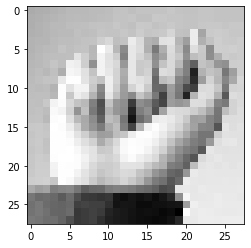

In [0]:
plt.imshow(gray_tensor, cmap = 'gray')

In [0]:
# Import operations from tensorflow
from tensorflow import reshape

# Reshape the grayscale image tensor into a vector
gray_vector = reshape(gray_tensor, (784, 1))